In [1]:
import networkx as nx
import sys
import gensim, logging
from pymorphy2 import MorphAnalyzer
import matplotlib.pyplot as plt 

morph = MorphAnalyzer()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
model.init_sims(replace=True)

2018-05-14 23:14:46,570 : INFO : loading projection weights from ruscorpora_upos_skipgram_300_5_2018.vec
2018-05-14 23:15:41,807 : INFO : loaded (195071, 300) matrix from ruscorpora_upos_skipgram_300_5_2018.vec
2018-05-14 23:15:41,808 : INFO : precomputing L2-norms of word weight vectors


In [3]:
words = set()
with open('text.txt') as text:
    for line in text:
        for word in line.split(' '):
            word = word.strip('.,:;?!()""''')
            ana = morph.parse(word)[0]
            if ana.tag.POS != None:
                words.add(ana.normal_form + '_' + ana.tag.POS)
words = list(words)
text.close()

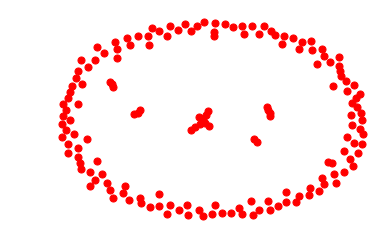

In [6]:
G = nx.Graph()
for i in range(len(words)):
    word = words[i]
    G.add_node(word)
for i in range(len(words)):
    word_1 = words[i]
    for j in range(i + 1, len(words)):
        word_2 = words[j]
        if (word_1 in model.vocab) and (word_2 in model.vocab):
            if model.similarity(word_1, word_2) > 0.5:
                G.add_edge(word_1, word_2)
nx.write_gexf(G, 'graph_file.gexf')
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='black')
plt.axis('off')
plt.show()

In [7]:
deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True)[:10]:
    print(nodeid)

метод_NOUN
исследование_NOUN
анализ_NOUN
применяться_VERB
лингвистика_NOUN
сервис_NOUN
обработка_NOUN
показывать_VERB
пользователь_NOUN
использоваться_VERB


In [12]:
for sub_G in nx.connected_component_subgraphs(G):
    if nx.radius(sub_G) != 0:
        print(nx.radius(sub_G))

3
1
1
1
1
2
1


In [13]:
print(nx.average_clustering(G))

0.005144032921810699
